### 1. Setting specifications for the graph

In [1]:
global graph_opts1 bgcolor(white) graphregion(color(white)) legend(region(lc(none) fc(none))) ylab(,angle(0) nogrid) subtitle(, justification(left) color(black) span pos(11)) title(, color(black) span)
global pct `" 0 "0%" .25 "25%" .5 "50%" .75 "75%" 1 "100%" "'

### 2. Running ado.file 
``tabgen`` splits categorical variables into binaries and correctly labels each category.

In [2]:
qui do "https://raw.githubusercontent.com/worldbank/Stata-IE-Visual-Library/develop/Library/Bar%20plots/Stack%20bar%20graph%20by%20two%20variables/tabgen.ado"

### 3. Uploading data (.dta)

In [3]:
use "https://github.com/worldbank/Stata-IE-Visual-Library/raw/develop/Library/Bar%20plots/Stack%20bar%20graph%20by%20two%20variables/data.dta", clear

### 4.  Cleaning and creating variables for the graph

In [4]:
qui gen n = 1 

qui replace med_b2_antister_cat = 5 if med == 0

egen checkgroup = group(case dr_3), label
	label def checkgroup 1 `""Case 1" "(503/599)""' 2 `""Case 1" "(96/599)""' ///
		3 `""Case 2" "(200/601)""' 4 `""Case 2" "(401/601)""' , modify

qui tabgen med_b2_antister_cat

### 5. Creating the graphs

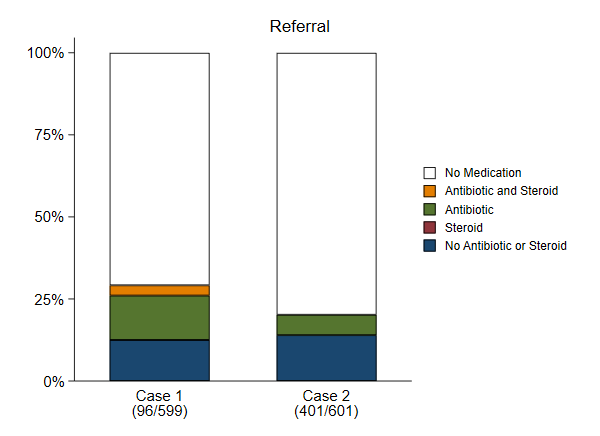

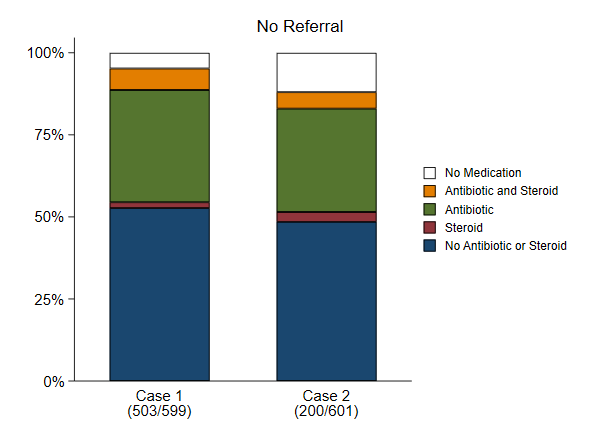

In [5]:
graph bar med_b2_antister_cat?? ///
	if dr_3 == 1 ///
	, stack over(checkgroup) nofill ///
	ylab($pct) legend(order(5 "No Medication" 4 "Antibiotic and Steroid" 3 "Antibiotic" 2 "Steroid" 1 "No Antibiotic or Steroid") ///
		c(1) symxsize(small) symysize(small) pos(3) size(small)) ///
	$graph_opts1 bar(5, color(white) lc(black) lp(solid) lw(thin)) ///
	bar(1,lw(thin) lc(black)) bar(2,lw(thin) lc(black)) bar(3,lw(thin) lc(black)) bar(4,lw(thin) lc(black)) ///
	subtitle("Referral" ,color(black) justification(center) pos(12)) 

qui graph save "figure_1.gph" , replace


graph bar med_b2_antister_cat?? ///
	if dr_3 == 0 ///
	, stack over(checkgroup) nofill ///
	ylab($pct) legend(order(5 "No Medication" 4 "Antibiotic and Steroid" 3 "Antibiotic" 2 "Steroid" 1 "No Antibiotic or Steroid") ///
		c(1) symxsize(small) symysize(small) pos(3) size(small)) ///
	$graph_opts1 bar(5, color(white) lc(black) lp(solid) lw(thin)) ///
	bar(1,lw(thin) lc(black)) bar(2,lw(thin) lc(black)) bar(3,lw(thin) lc(black)) bar(4,lw(thin) lc(black)) ///
	subtitle("No Referral" ,color(black) justification(center) pos(12)) 

qui graph save "figure_2.gph" , replace

### 6. Combining the graphs into one graph

In [6]:
grc1leg ///
	"figure_2.gph" ///
	"figure_1.gph" ///
	, pos(3) graphregion(color(white)) xsize(7) rows(1) leg("figure_2.gph")

### 7. Exporting the graph

In [7]:
qui graph export "figure.png" , replace